# Wikipedia's Best Selling Books

### 1. Data Preparation
### 2. EDA & Visualizations
### 3. Machine Learning Modeling

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

2024-02-16 05:18:33.637806: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 05:18:33.637927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 05:18:33.808774: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Import Data

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/best-selling-books/books_data.csv


In [3]:
df = pd.read_csv('/kaggle/input/best-selling-books/books_data.csv')

# Data Exploration

In [4]:
df.head()

,Unnamed: 0,Books,Authors,Language,First_Published,Sales_in_millions
0,0,A Tale of Two Cities,Charles Dickens,English,1859,200.0
1,1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0
2,2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0
3,3,And Then There Were None,Agatha Christie,English,1939,100.0
4,4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         290 non-null    int64  
 1   Books              290 non-null    object 
 2   Authors            290 non-null    object 
 3   Language           290 non-null    object 
 4   First_Published    290 non-null    object 
 5   Sales_in_millions  288 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 13.7+ KB


In [6]:
df.isna().sum()

Unnamed: 0           0
Books                0
Authors              0
Language             0
First_Published      0
Sales_in_millions    2
dtype: int64

# Data Cleaning and Transformation

## Drop duplicates

In [7]:
df = df.drop_duplicates()
df

,Unnamed: 0,Books,Authors,Language,First_Published,Sales_in_millions
0,0,A Tale of Two Cities,Charles Dickens,English,1859,200.0
1,1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0
2,2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0
3,3,And Then There Were None,Agatha Christie,English,1939,100.0
4,4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0
...,...,...,...,...,...,...
285,285,The No. 1 Ladies Detective Agency,Alexander McCall Smith,English,1999–present,15.0
286,286,Der Regenbogenfisch (Rainbow Fish),Marcus Pfister,German,1992–present,15.0
287,287,The Riftwar Cycle,Raymond E. Feist,English,1982–present,15.0
288,288,The Thrawn trilogy,Timothy Zahn,English,1991–93,15.0


## Perform Label Encoding

### Transform "Languages" variable

In [8]:
# Assign numerical labels to each category from the "language" column
le = LabelEncoder()
df['Language_encoded'] = le.fit_transform(df['Language'])

language_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Language Mapping:")
for language, encoded_value in language_mapping.items():
    print(f"{language}: {encoded_value}")

Language Mapping:
Chinese: 0
Czech: 1
Dutch: 2
English: 3
French: 4
German: 5
Gujarati: 6
Italian: 7
Japanese: 8
Norwegian: 9
Polish: 10
Portuguese: 11
Russian: 12
Spanish: 13
Swedish: 14
Yiddish: 15


### Simplify "First_Published" variable

In [9]:
# Convert 'First_Published' to a string (if it's not already)
df['First_Published'] = df['First_Published'].astype(str)

# Extract the initial publication year
df['year_published'] = df['First_Published'].str.extract(r'(\d{4})')

# Convert the new column to numeric (optional, if needed)
df['year_published'] = pd.to_numeric(df['year_published'], errors='coerce')

df = df.rename(columns={'First_Published': 'published_during'})

df

,Unnamed: 0,Books,Authors,Language,published_during,Sales_in_millions,Language_encoded,year_published
0,0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,3,1859
1,1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,4,1943
2,2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,3,1997
3,3,And Then There Were None,Agatha Christie,English,1939,100.0,3,1939
4,4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,0,1791
...,...,...,...,...,...,...,...,...
285,285,The No. 1 Ladies Detective Agency,Alexander McCall Smith,English,1999–present,15.0,3,1999
286,286,Der Regenbogenfisch (Rainbow Fish),Marcus Pfister,German,1992–present,15.0,5,1992
287,287,The Riftwar Cycle,Raymond E. Feist,English,1982–present,15.0,3,1982
288,288,The Thrawn trilogy,Timothy Zahn,English,1991–93,15.0,3,1991


## Label encoding for "Authors" column

In [10]:
le_author = LabelEncoder()
df['Authors_encoded'] = le_author.fit_transform(df['Authors'])

In [11]:
# Display the mapping of original authors to encoded numbers
author_mapping = dict(zip(le_author.classes_, le_author.transform(le_author.classes_)))
print("Author Mapping:")
for author, encoded_value in author_mapping.items():
    print(f"{author}: {encoded_value}")

Author Mapping:
A. A. Milne; illustrated by E. H. Shepard: 0
Agatha Christie: 1
Albert Camus: 2
Alex Comfort: 3
Alexander Alexandrovich Fadeyev: 4
Alexander McCall Smith: 5
Alf Wight, as James Herriot: 6
Alice Sebold: 7
Andrew Morton: 8
Andrzej Sapkowski: 9
Ann Martin: 10
Anna Sewell: 11
Anne Frank: 12
Anne McCaffrey: 13
Anne Rice: 14
Anthony Doerr: 15
Antoine de Saint-Exupéry: 16
Arlene Eisenberg and Heidi Murkoff: 17
Arthur Agatston: 18
Astrid Lindgren: 19
Banana Yoshimoto: 20
Barbara Park: 21
Beatrix Potter: 22
Benjamin Spock: 23
Beverly Cleary: 24
Boris Akunin: 25
Brandon Sanderson: 26
Brian Jacques: 27
C. S. Lewis: 28
Cao Xueqin: 29
Carl Sagan: 30
Carlo Collodi: 31
Carlos Ruiz Zafón: 32
Cassandra Clare: 33
Charlaine Harris: 34
Charles Berlitz: 35
Charles Dickens: 36
Chinua Achebe: 37
Christopher Paolini: 38
Clive Cussler: 39
Colleen McCullough: 40
Daisy Meadows: 41
Dale Carnegie: 42
Dan Brown: 43
Dante Alighieri: 44
Daphne du Maurier: 45
Dav Pilkey: 46
Delia Owens: 47
Desmond Morr

## Save cleaned data to new file ready for downloading

In [12]:
df.to_csv('cleaned_bookbestsellers.csv', index=False)
df

,Unnamed: 0,Books,Authors,Language,published_during,Sales_in_millions,Language_encoded,year_published,Authors_encoded
0,0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,3,1859,36
1,1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,4,1943,16
2,2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,3,1997,97
3,3,And Then There Were None,Agatha Christie,English,1939,100.0,3,1939,1
4,4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,0,1791,29
...,...,...,...,...,...,...,...,...,...
285,285,The No. 1 Ladies Detective Agency,Alexander McCall Smith,English,1999–present,15.0,3,1999,5
286,286,Der Regenbogenfisch (Rainbow Fish),Marcus Pfister,German,1992–present,15.0,5,1992,150
287,287,The Riftwar Cycle,Raymond E. Feist,English,1982–present,15.0,3,1982,189
288,288,The Thrawn trilogy,Timothy Zahn,English,1991–93,15.0,3,1991,234


In [13]:
df.describe()

,Unnamed: 0,Sales_in_millions,Language_encoded,year_published,Authors_encoded
count,290.000000,288.000000,290.000000,290.000000,290.000000
mean,144.500000,49.996875,4.251724,1969.568966,129.272414
std,83.860002,64.684632,2.865270,52.497063,75.333985
min,0.000000,10.000000,0.000000,1304.000000,0.000000
25%,72.250000,16.000000,3.000000,1955.000000,64.250000
50%,144.500000,25.000000,3.000000,1979.000000,127.500000
75%,216.750000,50.000000,3.000000,1996.750000,196.750000
max,289.000000,600.000000,15.000000,2018.000000,257.000000


# Correlation Matrix

                   Sales_in_millions  year_published  Language_encoded  \
Sales_in_millions           1.000000       -0.013364         -0.116593   
year_published             -0.013364        1.000000         -0.045031   
Language_encoded           -0.116593       -0.045031          1.000000   
Authors_encoded            -0.060263        0.154505          0.026083   

                   Authors_encoded  
Sales_in_millions        -0.060263  
year_published            0.154505  
Language_encoded          0.026083  
Authors_encoded           1.000000  


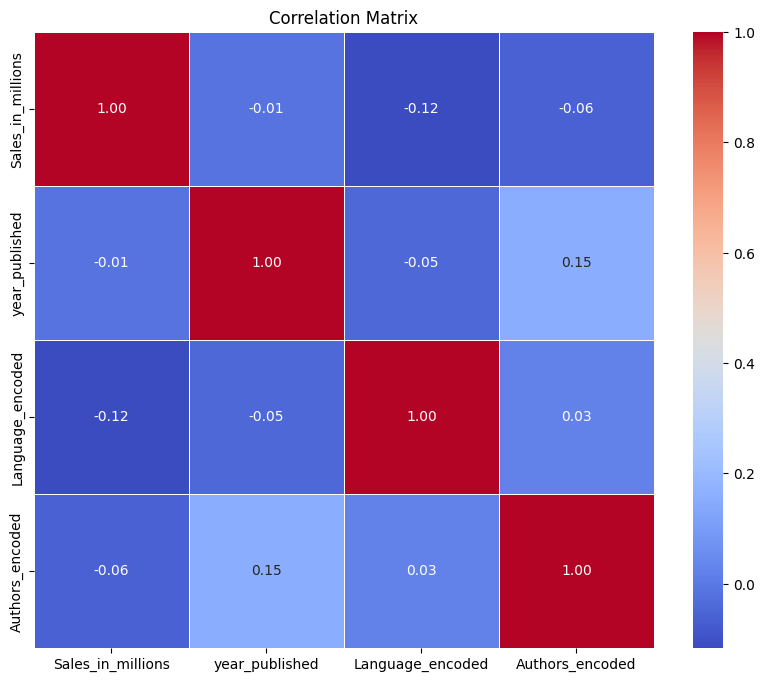

In [14]:
# Select only relevant columns for correlation analysis
selected_columns = ['Sales_in_millions', 'year_published', 'Language_encoded', 'Authors_encoded']

# Create a new DataFrame with only the selected columns
df_selected = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Data Analysis

## Authors with most books published

In [15]:
top_authors = df.groupby('Authors')['Books'].nunique().sort_values(ascending=False).head(10)
print(top_authors)

Authors
J. K. Rowling      8
Various authors    8
Dan Brown          4
Roald Dahl         3
E. L. James        3
Suzanne Collins    3
Ken Follett        2
Astrid Lindgren    2
R. L. Stine        2
Helen Fielding     2
Name: Books, dtype: int64


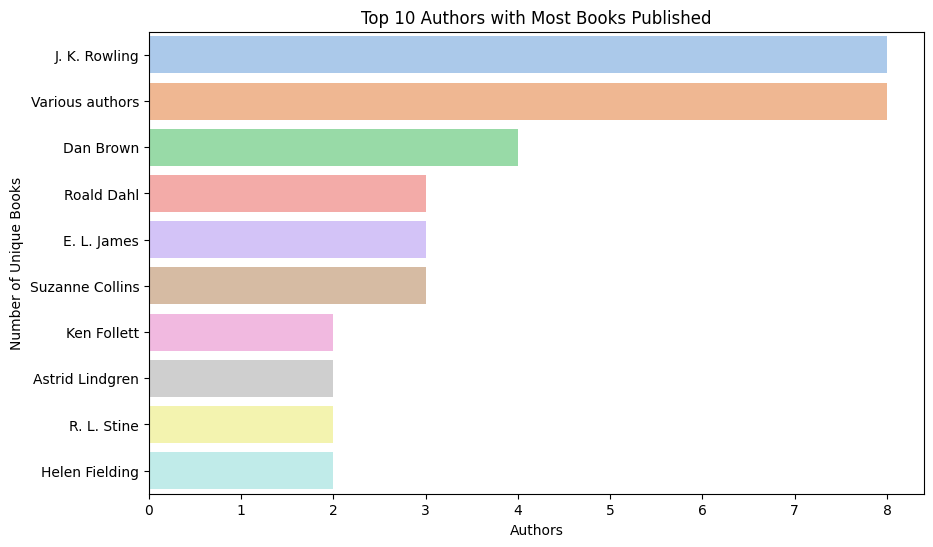

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_authors.index, x=top_authors, palette='pastel')
plt.title('Top 10 Authors with Most Books Published')
plt.xlabel('Authors')
plt.ylabel('Number of Unique Books')
plt.show()


## Top Selling Books of All-time

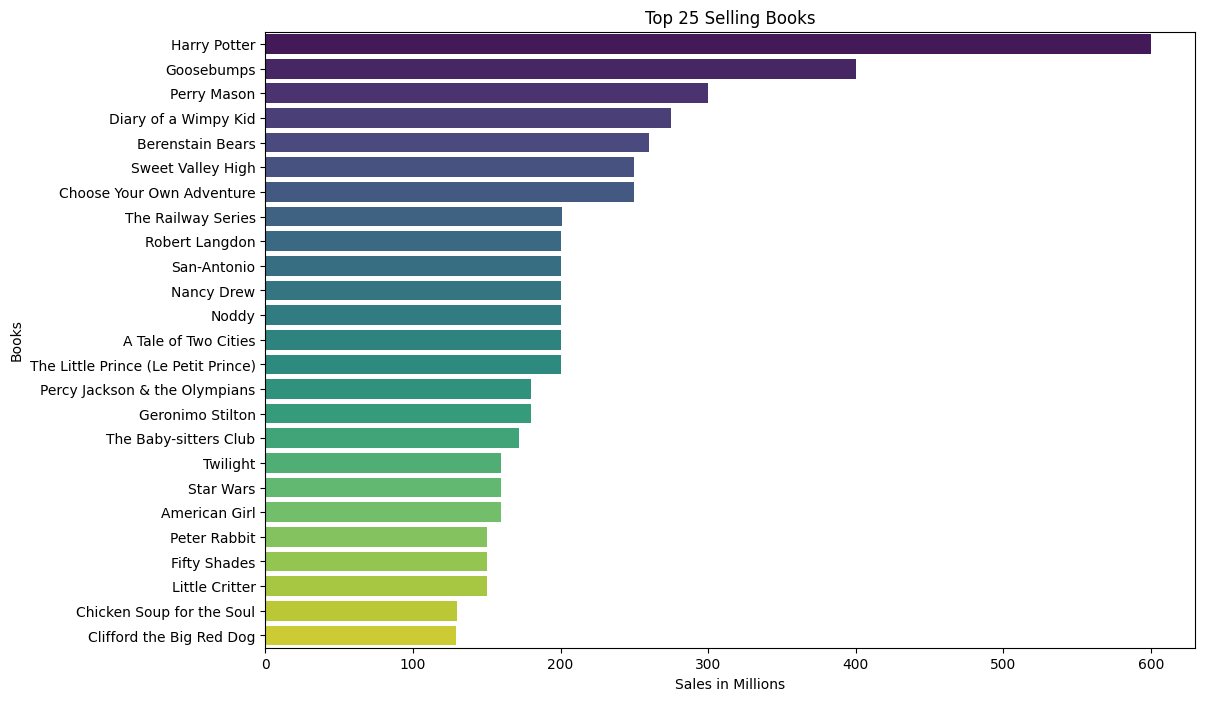

In [17]:
top_selling_books = df.sort_values(by='Sales_in_millions', ascending=False).head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x='Sales_in_millions', y='Books', data=top_selling_books, palette='viridis')
plt.title('Top 25 Selling Books')
plt.xlabel('Sales in Millions')
plt.ylabel('Books')
plt.show()

## Distribution of Publication years

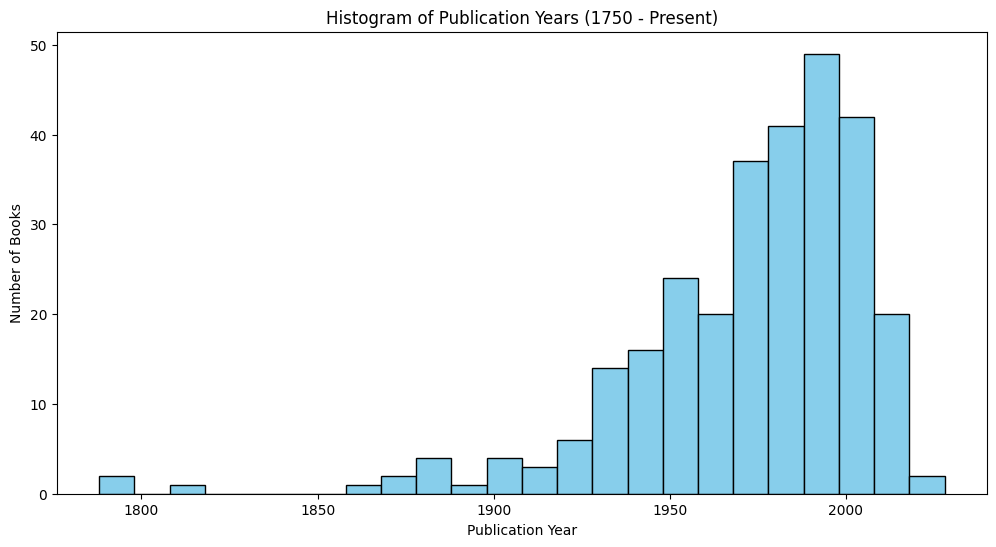

In [18]:
# Filter out data before 1750
filtered_df = df[df['year_published'] >= 1750]

# Create bins for intervals of 10 years
bins = range(min(filtered_df['year_published']), max(filtered_df['year_published']) + 11, 10)

plt.figure(figsize=(12, 6))
plt.hist(filtered_df['year_published'], bins=bins, color='skyblue', edgecolor='black')
plt.title('Histogram of Publication Years (1750 - Present)')
plt.xlabel('Publication Year')
plt.ylabel('Number of Books')
plt.show()

### Top 25 Authors by Total Sales

In [19]:
# Group by authors and sum the sales
sales_by_author = df.groupby('Authors')['Sales_in_millions'].sum().reset_index()

# Sort the data by total sales in descending order
sales_by_author = sales_by_author.sort_values(by='Sales_in_millions', ascending=False)

# Select the top 25 authors
top_25_authors = sales_by_author.head(25)

# Create a bar chart
fig = px.bar(top_25_authors, x='Authors', y='Sales_in_millions', labels={'Sales_in_millions': 'Total Sales (in millions)'}, title='Top 25 Authors by Total Sales')

# Update layout for better readability
fig.update_layout(xaxis_title='Authors', yaxis_title='Total Sales (in millions)', xaxis_tickangle=-45)

# Show the plot
fig.show()


## How many books were published in a certain year

In [20]:
# Assuming df is your DataFrame with 'published_during' and 'Books' columns

# Apply a lambda function to create a new column 'published_in_2023'
df['published_in_2023'] = df['published_during'].apply(lambda x: pd.isna(x) or "present" in str(x).lower() or ("-" in str(x) and 2023 in map(int, str(x).split("-"))) or (str(x).isdigit() and int(x) == 2023))

# Filter the DataFrame for books published in 2023
books_published_2023 = df[df['published_in_2023']]

# Count the number of books published in 2023
num_books_published_2023 = len(books_published_2023)

# Display the result
print(f"The number of books published in 2023 is: {num_books_published_2023}")

The number of books published in 2023 is: 60


## Distribution of Sales

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



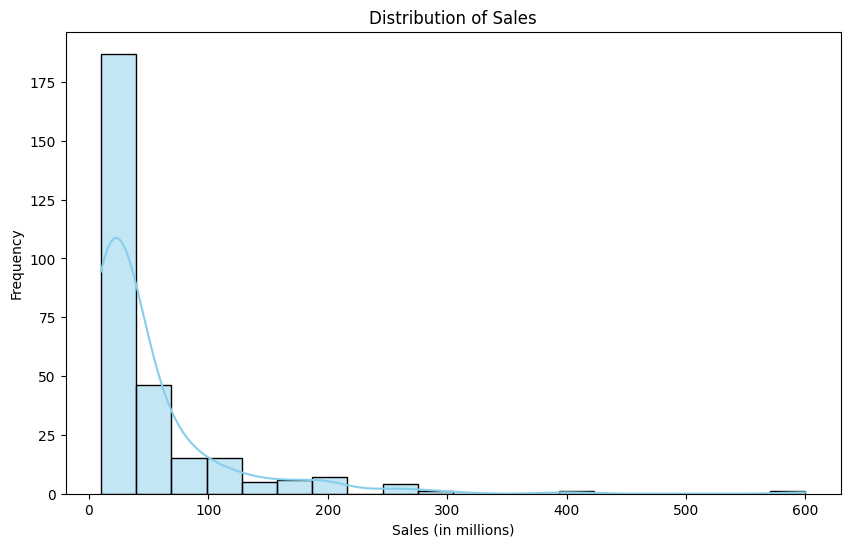

In [21]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales_in_millions'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

## Sales Per Language

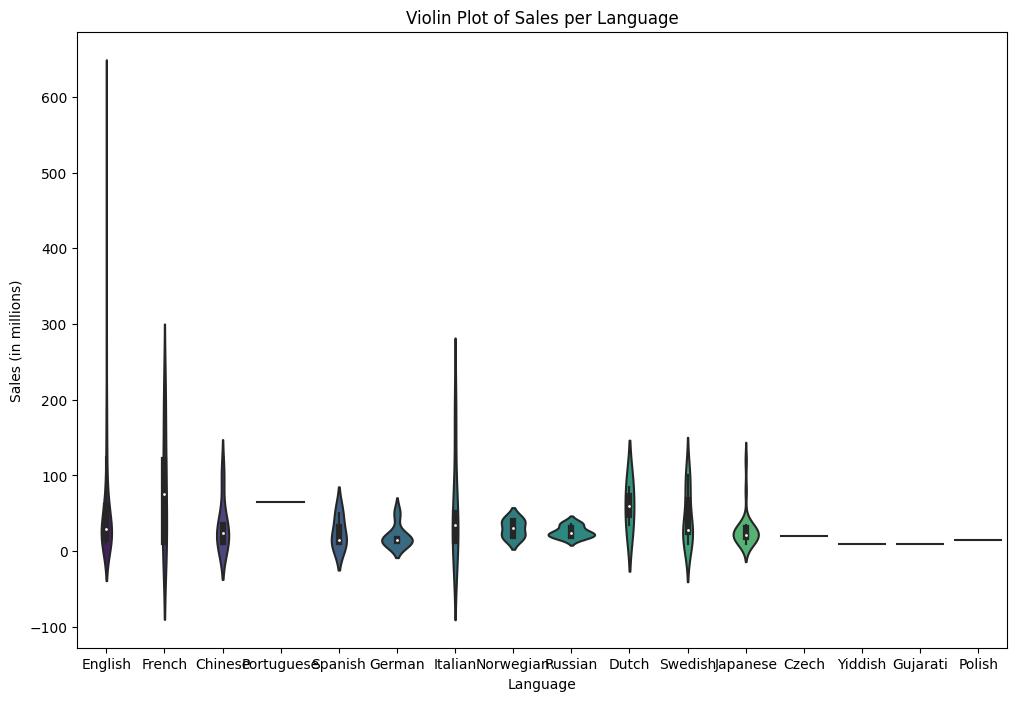

In [22]:
# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Language', y='Sales_in_millions', data=df, palette='viridis')
plt.title('Violin Plot of Sales per Language')
plt.xlabel('Language')
plt.ylabel('Sales (in millions)')
plt.show()

# Machine Learning Modeling

## Linear Regression

<Figure size 1200x800 with 0 Axes>

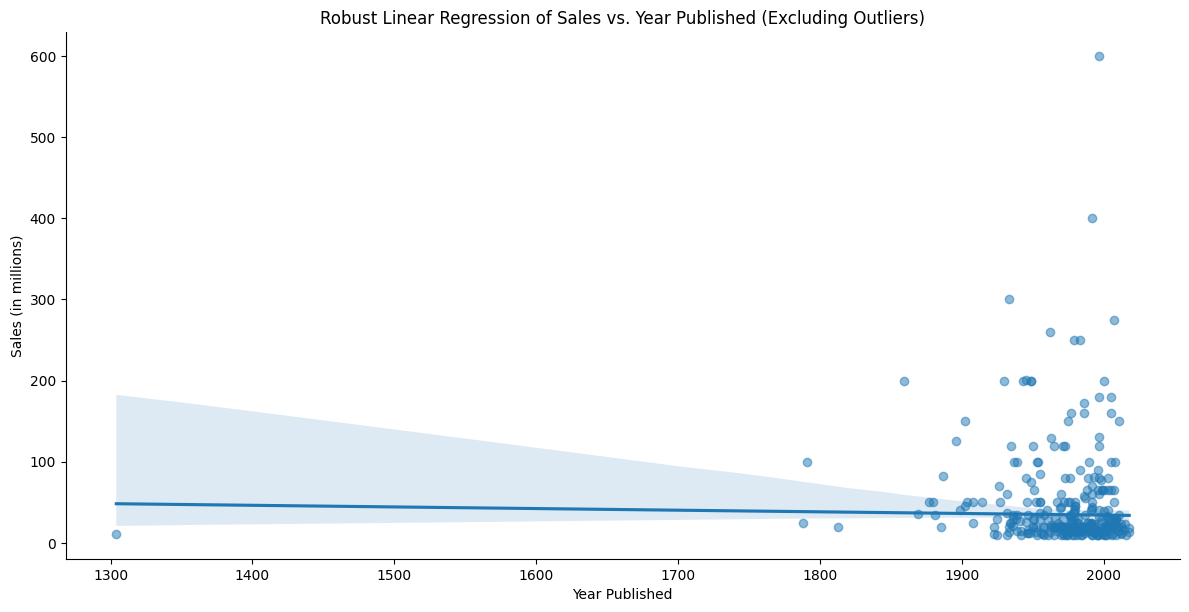

In [23]:
# Create a linear regression plot with robust regression
plt.figure(figsize=(12, 8))
sns.lmplot(x='year_published', y='Sales_in_millions', data=df, height=6, aspect=2, scatter_kws={'alpha': 0.5}, robust=True)
plt.title('Robust Linear Regression of Sales vs. Year Published (Excluding Outliers)')
plt.xlabel('Year Published')
plt.ylabel('Sales (in millions)')
plt.show()

## Multiple Regression

In [24]:
# Drop rows with missing values in 'Sales_in_millions'
df_cleaned = df.dropna(subset=['Sales_in_millions'])

In [25]:
X_cleaned = df_cleaned[['year_published', 'Language_encoded', 'Authors_encoded']]
y_cleaned = df_cleaned['Sales_in_millions']

In [26]:
# Split the data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [27]:
# Create and fit the linear regression model
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

LinearRegression()

In [28]:
# Make predictions on the test set
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

# Evaluate the model
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
print(f'Mean Squared Error: {mse_cleaned}')

# Print the coefficients and intercept of the cleaned model
print('Coefficients:', model_cleaned.coef_)
print('Intercept:', model_cleaned.intercept_)

Mean Squared Error: 6095.998084968471
Coefficients: [-0.12690604 -1.99718274 -0.05595586]
Intercept: 313.78963214896544


## Decision Tree Model

In [29]:
# Remove rows with missing values in the 'Sales_in_millions' column
df_cleaned = df.dropna(subset=['Sales_in_millions'])

# Verify that missing values have been removed
missing_values_cleaned = df_cleaned.isnull().sum()
print(missing_values_cleaned)

Unnamed: 0           0
Books                0
Authors              0
Language             0
published_during     0
Sales_in_millions    0
Language_encoded     0
year_published       0
Authors_encoded      0
published_in_2023    0
dtype: int64


In [30]:
# Select features (X) and target variable (y)
X = df_cleaned[['Language_encoded', 'year_published', 'Authors_encoded']]
y = df_cleaned['Sales_in_millions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 9491.372413793106
R-squared: -0.6270002363669387


## Random Forest Model

In [31]:
# Create and fit the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

In [32]:
# Evaluate the model
# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Mean Absolute Error (Random Forest): {mae_rf}')

Mean Absolute Error (Random Forest): 54.32082471264367
